In [1]:

import numpy as np
import os
import pylab as py
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\USER\\Downloads\\Microsoft.SkypeApp_kzf8qxf38zg5c!App\\All'

In [4]:
path=os.getcwd()

In [5]:
data = pd.read_csv('CLI data.csv')
data.head()

,Rank,City,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
0,1,"Zurich, Switzerland",149.53,66.76,163.71,140.58,126.30
1,2,"Hamilton, Bermuda",148.13,117.80,145.20,152.54,93.42
2,3,"Zug, Switzerland",142.54,67.39,148.36,143.18,105.62
3,4,"Geneva, Switzerland",142.12,70.25,147.13,138.96,115.20
4,5,"Basel, Switzerland",142.02,51.54,149.54,131.72,113.13


In [6]:
data.shape

(511, 7)

In [7]:
data.describe()

,Rank,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,256.000000,65.177691,26.765793,63.414697,58.992524,79.989687
std,147.657261,22.371029,17.651107,24.380114,26.669124,33.742696
min,1.000000,21.750000,3.130000,22.030000,12.120000,2.960000
25%,128.500000,45.740000,12.975000,42.460000,33.325000,51.285000
50%,256.000000,70.640000,24.540000,64.980000,65.370000,84.160000
75%,383.500000,79.765000,34.440000,80.460000,78.175000,104.555000
max,511.000000,149.530000,119.630000,163.710000,152.540000,176.220000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFDBFEAF98>,
      dtype=object)

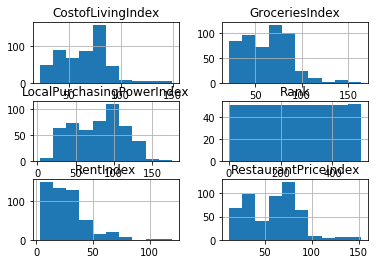

In [8]:
data.hist()

In [9]:
data.corr()

,Rank,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
Rank,1.000000,-0.959172,-0.782664,-0.913607,-0.916782,-0.655340
CostofLivingIndex,-0.959172,1.000000,0.785660,0.951882,0.950629,0.642080
RentIndex,-0.782664,0.785660,1.000000,0.767436,0.752309,0.600043
GroceriesIndex,-0.913607,0.951882,0.767436,1.000000,0.851855,0.645834
RestaurantPriceIndex,-0.916782,0.950629,0.752309,0.851855,1.000000,0.643693
LocalPurchasingPowerIndex,-0.655340,0.642080,0.600043,0.645834,0.643693,1.000000


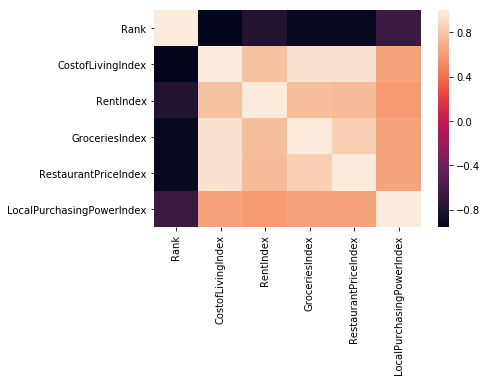

In [10]:
sns.heatmap(data.corr())

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict

scale = StandardScaler()

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
x = data.loc[:,['Rank','RentIndex','GroceriesIndex','RestaurantPriceIndex','LocalPurchasingPowerIndex']]
y = data[['CostofLivingIndex']]

In [13]:
x_scaled = scale.fit_transform(x)

In [14]:
lr = linear_model.LinearRegression()
LR = lr.fit(x,y)

In [15]:
LR.intercept_

array([29.46892239])

In [21]:
LR.coef_

array([[-0.03117383,  0.00516259,  0.39661961,  0.35160098, -0.02928196]])

In [ ]:
yhat = LR.predict(x_scaled)

In [ ]:
predicted = cross_val_predict(lr, x, y, cv=10)

In [24]:
def predictSales(Rank,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex):
    return(29.46 + (-0.03*Rank) - (0.005*RentIndex) + (0.39*GroceriesIndex) + ( 0.35*RestaurantPriceIndex) -(-0.02*LocalPurchasingPowerIndex))

In [28]:
data.head(10)

,Rank,City,CostofLivingIndex,RentIndex,GroceriesIndex,RestaurantPriceIndex,LocalPurchasingPowerIndex
0,1,"Zurich, Switzerland",149.53,66.76,163.71,140.58,126.30
1,2,"Hamilton, Bermuda",148.13,117.80,145.20,152.54,93.42
2,3,"Zug, Switzerland",142.54,67.39,148.36,143.18,105.62
3,4,"Geneva, Switzerland",142.12,70.25,147.13,138.96,115.20
4,5,"Basel, Switzerland",142.02,51.54,149.54,131.72,113.13
5,6,"Bern, Switzerland",135.51,45.33,145.72,122.48,101.65
6,7,"Lausanne, Switzerland",131.38,54.56,136.95,127.87,112.33
7,8,"Reykjavik, Iceland",130.73,55.90,128.37,140.61,68.49
8,9,"Lugano, Switzerland",124.39,51.73,120.83,127.53,108.92
9,10,"Stavanger, Norway",116.98,37.40,107.72,142.61,101.00


In [26]:
predictSales(5,51.54,149.54,131.72,113.13)


135.73749999999998

In [29]:
predictSales(10,37.40,107.72,142.61,101.00)

122.9173

In [32]:
predictSales(7,54.56,136.95,127.87,112.33)

129.3888

In [31]:
LR.score(x,y)

0.9820997139190374